# GDP, life expectancy and their relationship
## 1. Preparing the data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math


data_file = pd.read_csv('all_data.csv')
print('###DataFrame info:')
print(data_file.info())
print('''###############################################
####DataFrame sample:''')
print(data_file.head())




###DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
###############################################
####DataFrame sample:
  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                             

In [4]:
#Renaming the life expectancy column to make it usable as an attribute
data_file.rename(columns = {'Life expectancy at birth (years)':'Life'}, inplace = True)

#Working out GDP values by dividing them by 1,000,000,000 for more readable presentation
data_file.GDP = data_file['GDP'].apply(lambda x: round((x / 1000000000),4))

#Checking the data after modifications:
print(data_file.head())

#Checking the list of countries
print(data_file.Country.unique())

  Country  Year  Life      GDP
0   Chile  2000  77.3  77.8609
1   Chile  2001  77.3  70.9799
2   Chile  2002  77.8  69.7368
3   Chile  2003  77.9  75.6435
4   Chile  2004  78.0  99.2104
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


## 2. Data Distribution (GDP)

Exploring the GDP value distribution and the shape of the dataset: the distribution of values is right-skewed with 50% of the values falling under approximately 5000 bln dollars. It is also apparent that China and USA have a relatively wide range of values, while the remaining countries - especially Zimbabwe and Chile - have a very narrow range of GDP values reported in the dataset.

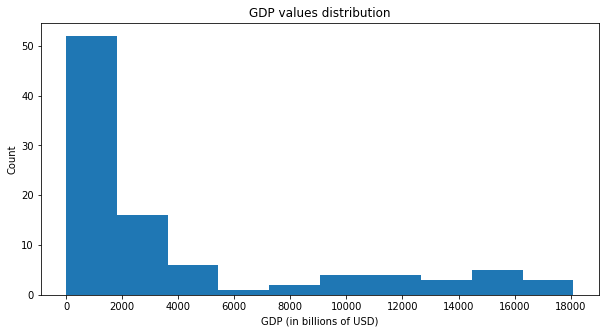

<Figure size 432x288 with 0 Axes>

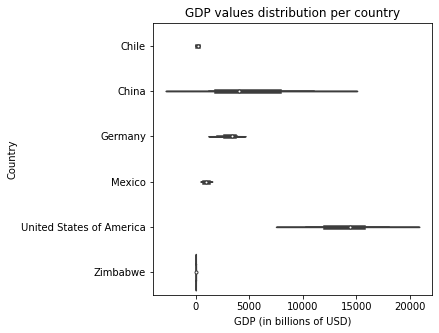

<Figure size 432x288 with 0 Axes>

In [41]:
fig, ax = plt.subplots(figsize=(10,5))
plt.hist(data_file['GDP'], bins=10)
plt.title('GDP values distribution')
plt.xlabel('GDP (in billions of USD)')
plt.ylabel('Count')
ax.set_xticks([0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000])
plt.show()
plt.clf()

fig, ax = plt.subplots(figsize=(5,5))
sns.violinplot(x='GDP', y='Country', data = data_file)
plt.title('GDP values distribution per country')
plt.xlabel('GDP (in billions of USD)')
plt.show()
plt.clf()

## 3. Data distribution (Life Expectancy)

Exploring the life expectancy value distribution and the general shape of the dataset: the values are left-skewed with majority of values falling above 70 years. The widest range of values is represented by data from Zimbabwe, while the other countries' ranges are comparatively narrow.

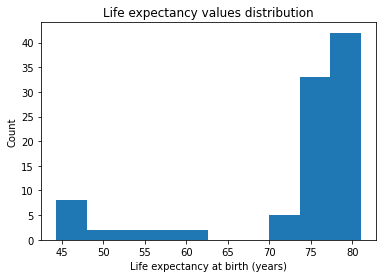

<Figure size 432x288 with 0 Axes>

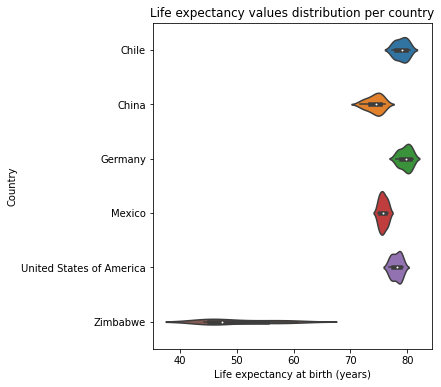

<Figure size 432x288 with 0 Axes>

In [46]:
plt.hist(data_file['Life'])
plt.title('Life expectancy values distribution')
plt.xlabel('Life expectancy at birth (years)')
plt.ylabel('Count')
plt.show()
plt.clf()


fig, ax = plt.subplots(figsize=(5,6))
sns.violinplot(x='Life', y='Country', data = data_file)
plt.title('Life expectancy values distribution per country')
plt.xlabel('Life expectancy at birth (years)')
plt.show()
plt.clf()

## 4. Trends over time (GDP)

The GDP values appear to be positively correlated with time. The chart below presents the GDP over time trends for all countries. The GDP values differ considerably between the countries, making it difficult to see the trend for Zimbabwe and Chile, which have the lowest GDP values.

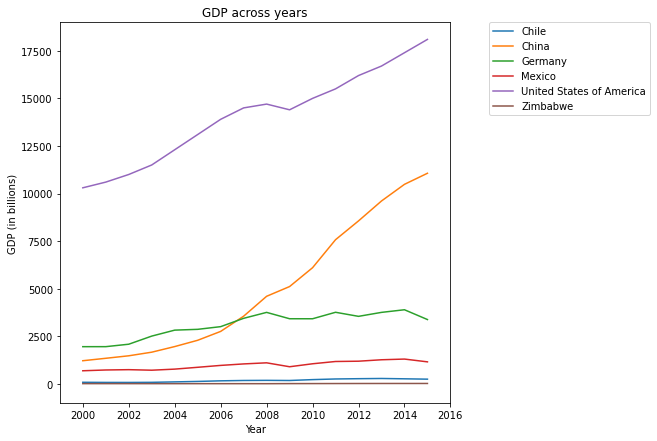

<Figure size 432x288 with 0 Axes>

In [53]:
plt.figure(figsize=[7,7])
for i in data_file.Country.unique():
    yvalues= data_file['GDP'][data_file['Country']==i]
    xvalues= data_file['Year'][data_file['Country']==i]
    plt.plot(xvalues, yvalues)
plt.legend(data_file.Country.unique(), bbox_to_anchor=(1.1, 1),loc='upper left', borderaxespad=0.) 
plt.axis([1999,2016,-1000,19000])
plt.title("GDP across years")
plt.xlabel('Year')
plt.ylabel('GDP (in billions)')
plt.show()
plt.clf()

The below charts make the observation of individual trends easier. Despite a positive correlation between time and GDP, there are individual cases where GDP drops - especially in Chile and Mexico. Germany's positive correlation has become less apparent after 2007.

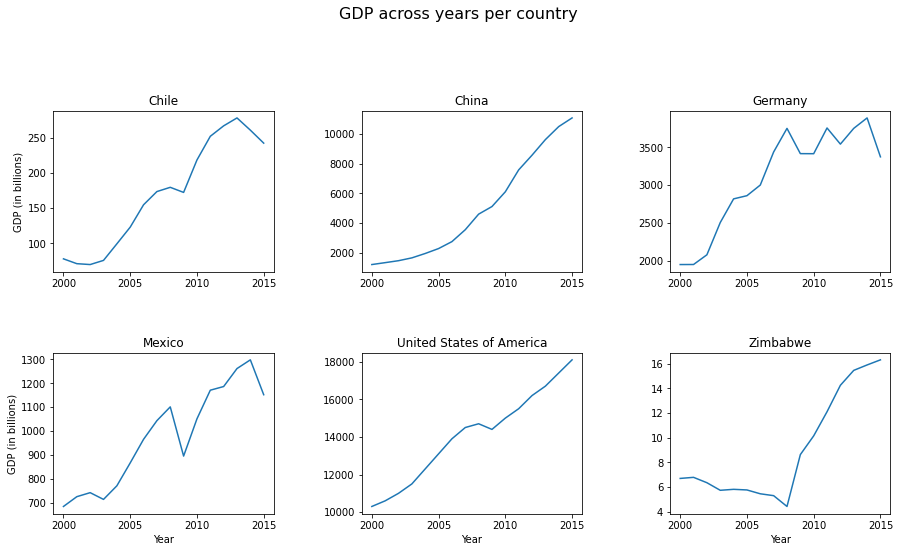

<Figure size 432x288 with 0 Axes>

In [75]:
fig, ax = plt.subplots(figsize=(15,8))
fig.suptitle('GDP across years per country', size=16)
counter = 0
for i in data_file.Country.unique():
    counter += 1
    ax = plt.subplot(2,3,counter)
    yvalues= data_file['GDP'][data_file['Country']==i]
    xvalues= data_file['Year'][data_file['Country']==i]
    plt.plot(xvalues, yvalues)
    plt.title(i)
    if counter in (1, 4):
        plt.ylabel('GDP (in billions)')
    if counter in (4, 5, 6):
        plt.xlabel('Year')
    
    ax.set_xticks([2000,2005,2010,2015])
plt.subplots_adjust(hspace = 0.5, wspace = 0.4, bottom = 0.1, top = 0.8)
plt.show()
plt.clf()

## 5. Trends over time (Life Expectancy)

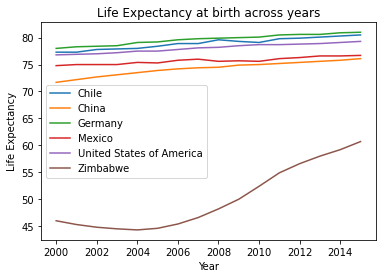

<Figure size 432x288 with 0 Axes>

In [15]:
for i in data_file.Country.unique():
    yvalues= data_file['Life'][data_file['Country']==i]
    xvalues= data_file['Year'][data_file['Country']==i]
    plt.plot(xvalues, yvalues)

plt.legend(data_file.Country.unique())   
plt.title("Life Expectancy at birth across years")
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()
plt.clf()

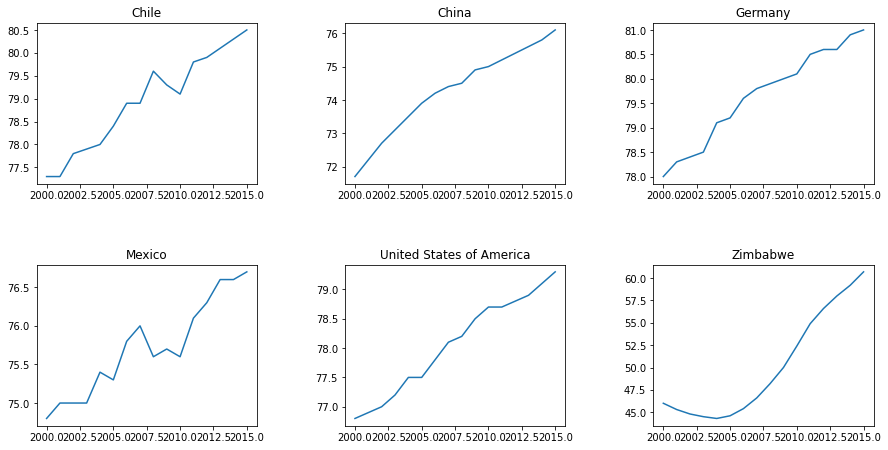

<Figure size 432x288 with 0 Axes>

In [16]:
plt.figure(figsize=[15,8])
counter = 0
for i in data_file.Country.unique():
    counter += 1
    plt.subplot(2,3,counter)
    yvalues= data_file['Life'][data_file['Country']==i]
    xvalues= data_file['Year'][data_file['Country']==i]
    plt.plot(xvalues, yvalues)
    plt.title(i)
# plt.legend(data_file.Country.unique(), bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.) 
# plt.axis([1999,2016,-1000,19000])
# plt.title("GDP across years")
# plt.xlabel('Year')
# plt.ylabel('GDP (in billions)')
plt.subplots_adjust(hspace = 0.5, wspace = 0.4, bottom = 0.1, top = 0.8)
plt.show()
plt.clf()

## 6. Linear relationship between GDP and Life Expectancy
###	- plot a line chart showing each country's GDP and life expectancy trend
###	- estimate the linear correlation

The three plots below attempt to consolidate the data for all countries and present trends over time and the relationship between Life Expectancy and GDP.
What becomes immediately evident is that there is a significant discrepancy between each country's GDP, which consequently fails any attempt to draw a linear correlation between GDP and Life Expectancy when analyzing the data from all countries at once.

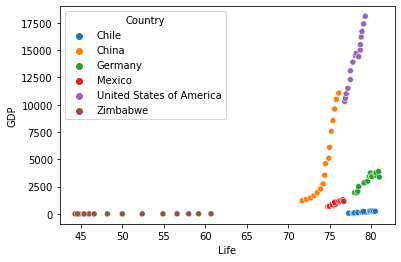

<Figure size 432x288 with 0 Axes>

In [17]:
sns.scatterplot(y = 'GDP', x = 'Life', data = data_file, hue = 'Country')
plt.show()
plt.clf()

Linear regression is not possible as the normality assumption is not met. This can be checked through statsmodels formula. The histogram drawn from the modeled data is not normally distributed by a long shot.

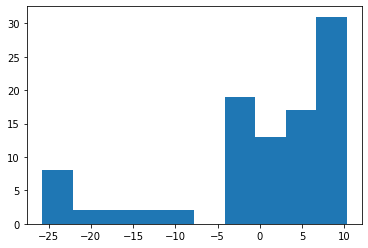

In [43]:
model = sm.OLS.from_formula('Life ~ GDP', data = data_file)
results = model.fit()
fitted_values = results.predict(data_file)
residuals = data_file.Life - fitted_values
plt.hist(residuals)
plt.show()

Given the above findings, we decided to approach each country's data separately and try to draw conclusions for individual countries.

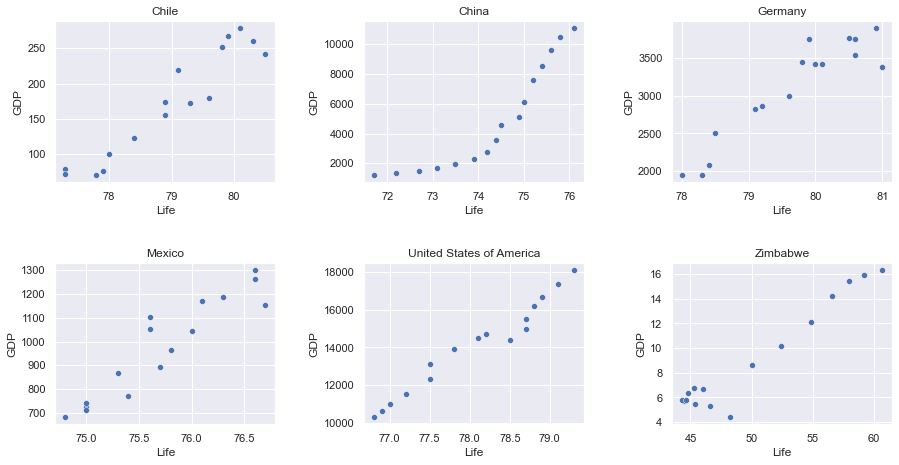

<Figure size 432x288 with 0 Axes>

In [68]:
plt.figure(figsize=[15,8])
counter = 0
for i in data_file.Country.unique():
    counter += 1
    plt.subplot(2,3,counter)
    sns.scatterplot(y = 'GDP', x = 'Life', data = data_file[data_file['Country']==i])
    plt.title(i)
# plt.legend(data_file.Country.unique(), bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.) 
# plt.axis([1999,2016,-1000,19000])
# plt.title("GDP across years")
# plt.xlabel('Year')
# plt.ylabel('GDP (in billions)')
plt.subplots_adjust(hspace = 0.5, wspace = 0.4, bottom = 0.1, top = 0.8)
plt.show()
plt.clf()


Checking whether the normal distribution of residuals for individual countries

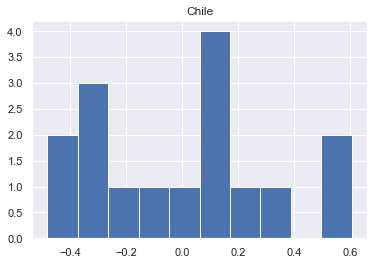

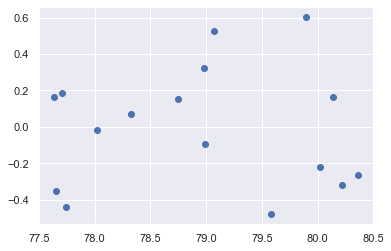

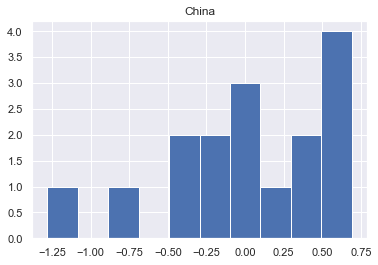

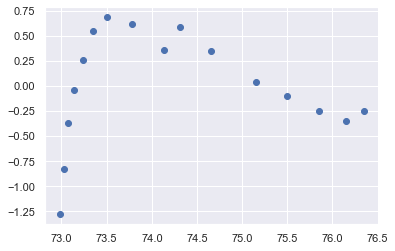

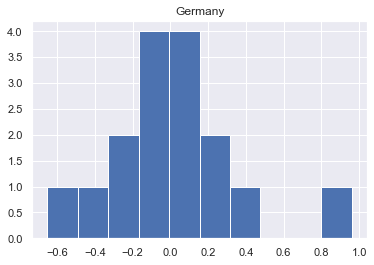

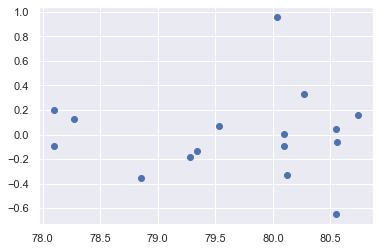

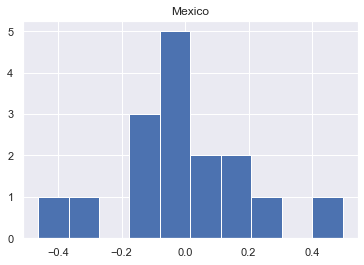

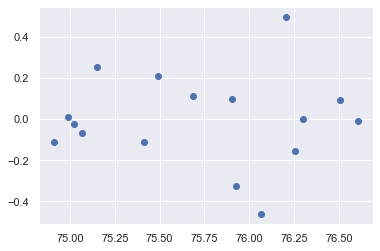

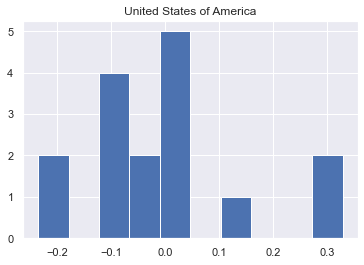

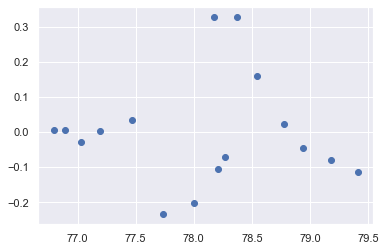

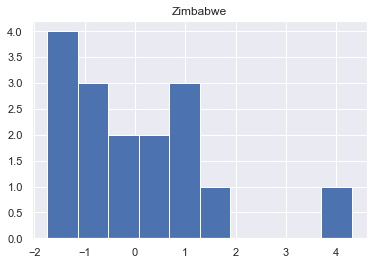

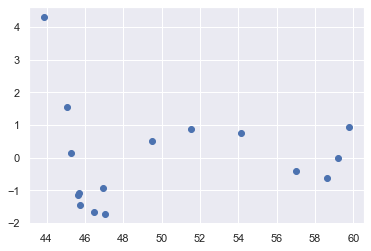

In [78]:
for i in data_file.Country.unique():
    model = sm.OLS.from_formula('Life ~ GDP', data = data_file[data_file['Country']==i])
    results = model.fit()
    fitted_values = results.predict(data_file[data_file['Country']==i])
    residuals = data_file.Life[data_file['Country']==i] - fitted_values
    plt.hist(residuals)
    plt.title(i)
    plt.show()
    plt.scatter(fitted_values, residuals)
    plt.show()
   

Need to check linear correlation between GDP and Life Expectancy at different years

# 3. Averages

{'Chile': 169.78884375, 'China': 4957.71375, 'Germany': 3094.7756249999998, 'Mexico': 976.650625, 'USA': 14075.0, 'Zimbabwe': 9.062593750000001}


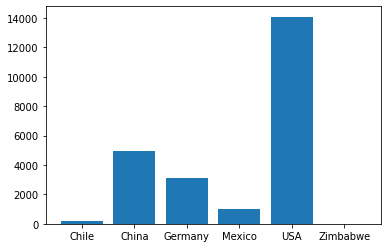

In [24]:
mean_GDP_values = {}
for i in data_file.Country.unique():
    j=i
    if i == 'United States of America':
        j = 'USA'
    mean_GDP_values[j] = np.mean(data_file[data_file['Country']==i]['GDP'])
    
print(mean_GDP_values)

plt.bar(mean_GDP_values.keys(), mean_GDP_values.values())
plt.show()

{'Chile': 78.94375, 'China': 74.26249999999999, 'Germany': 79.65625, 'Mexico': 75.71875, 'USA': 78.0625, 'Zimbabwe': 50.09375}


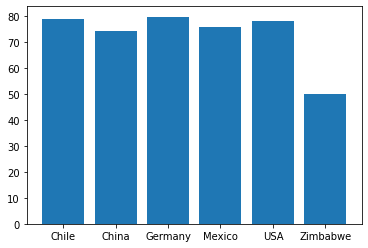

In [26]:
mean_LE_values = {}
for i in data_file.Country.unique():
    j=i
    if i == 'United States of America':
        j = 'USA'
    mean_LE_values[j] = np.mean(data_file[data_file['Country']==i]['Life'])
    
print(mean_LE_values)

plt.bar(mean_LE_values.keys(), mean_LE_values.values())
plt.show()